In [33]:
import pandas as pd 
import numpy as np 
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [35]:
df.drop(columns="Unnamed: 0",inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Features-----------> TV,Radio,Newspaper
Label/Target------>sales

In [36]:
df.shape

(200, 4)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [38]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

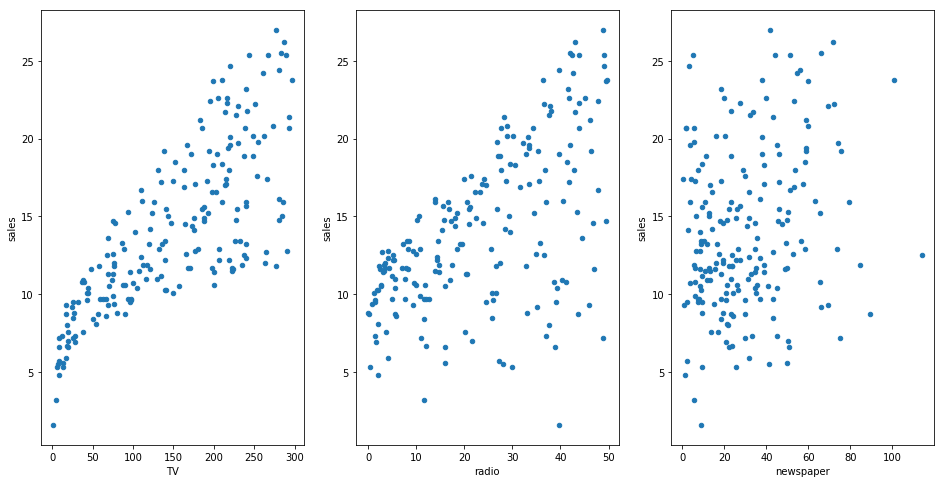

In [39]:
fig,axs=plt.subplots(1,3)
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot.scatter(x='newspaper',y='sales',ax=axs[2])
plt.show()
fig.savefig('inest.jpg')

# SIMPLE LINEAR REGRESSION

In [40]:
from sklearn.linear_model import LinearRegression
x=df[['TV']]
y=df['sales']
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
lm.intercept_

7.032593549127693

In [42]:
lm.coef_[0]

0.047536640433019764

In [43]:
x_new=pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})
x_new

,TV
0,0.7
1,296.4


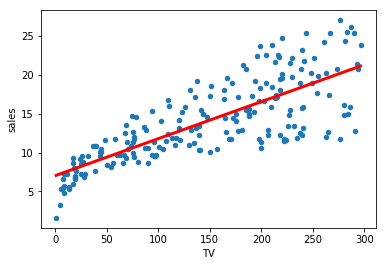

In [44]:
pred=lm.predict(x_new)
pred

df.plot.scatter(x='TV',y='sales')
plt.plot(x_new,pred,linewidth=3,c='r')

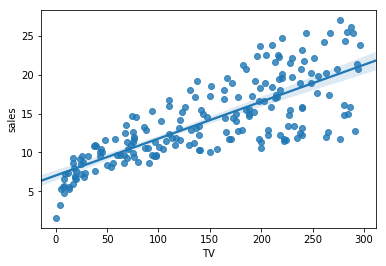

In [45]:
import seaborn as sns
sns.regplot(data=df,x='TV',y='sales')

# Model Confidence

## Hypothesis testing & p_value

Ho: No relationship exists between TV & sales 

H1: reltionship exists between tv & sales

In [46]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV',data=df).fit()

In [47]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [48]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [49]:
lm.rsquared

0.611875050850071

# Multiple Linear Regression

In [50]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [51]:
lm=LinearRegression()
x=df[['TV','radio','newspaper']]
y=df.sales
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
print("Intercept:-----",lm.intercept_,"\n Coefficient:\n\tTV:------->",lm.coef_[0],"\n\tRadio:----->",lm.coef_[1],"\n\tNewspaper:----->",lm.coef_[2])

Intercept:----- 2.9388893694594067 
 Coefficient:
	TV:-------> 0.04576464545539761 
	Radio:-----> 0.18853001691820462 
	Newspaper:-----> -0.0010374930424762972


In [53]:
lm=smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        13:37:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model confidence

In [54]:
lm=smf.ols(formula='sales~TV+radio',data=df).fit()
lm.rsquared

0.8971942610828957

In [55]:
lm=smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()
lm.rsquared

0.8972106381789522

# Project 1: admission chances

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [57]:
df=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [58]:
df.shape

(500, 9)

In [59]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [60]:
df['GRE Score']=df['GRE Score'].fillna(df['GRE Score'].mean())
df['TOEFL Score']=df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['University Rating']=df['University Rating'].fillna(df['University Rating'].mode()[0])

In [61]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [62]:
df.drop(columns=['Serial No.'],inplace=True)

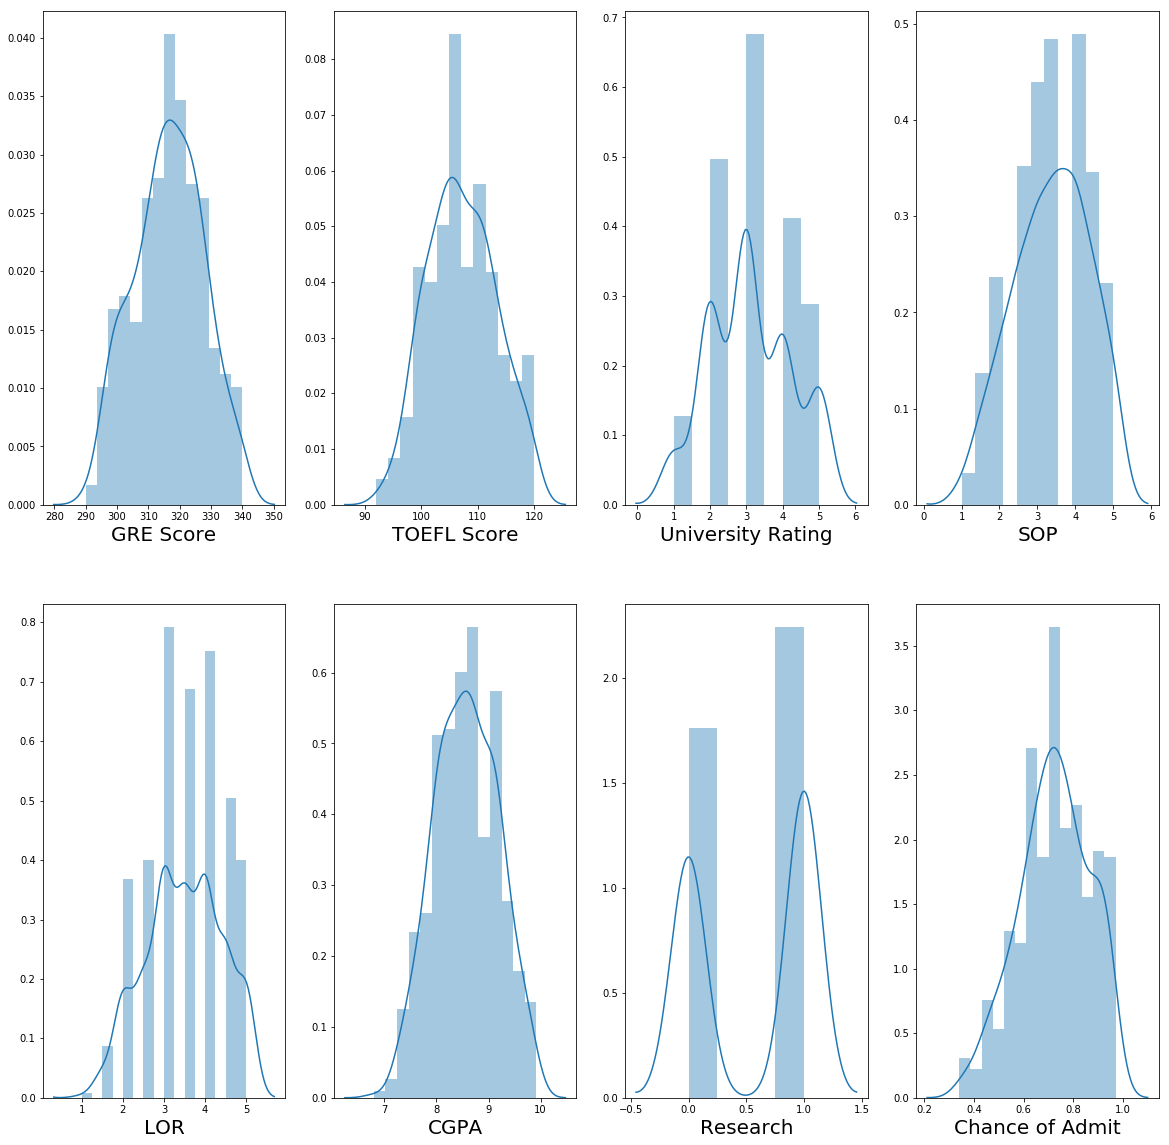

In [63]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in df:
    if plotno<=8:
        ax=plt.subplot(2,4,plotno)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

In [64]:
y=df['Chance of Admit']
x=df.drop(columns='Chance of Admit')

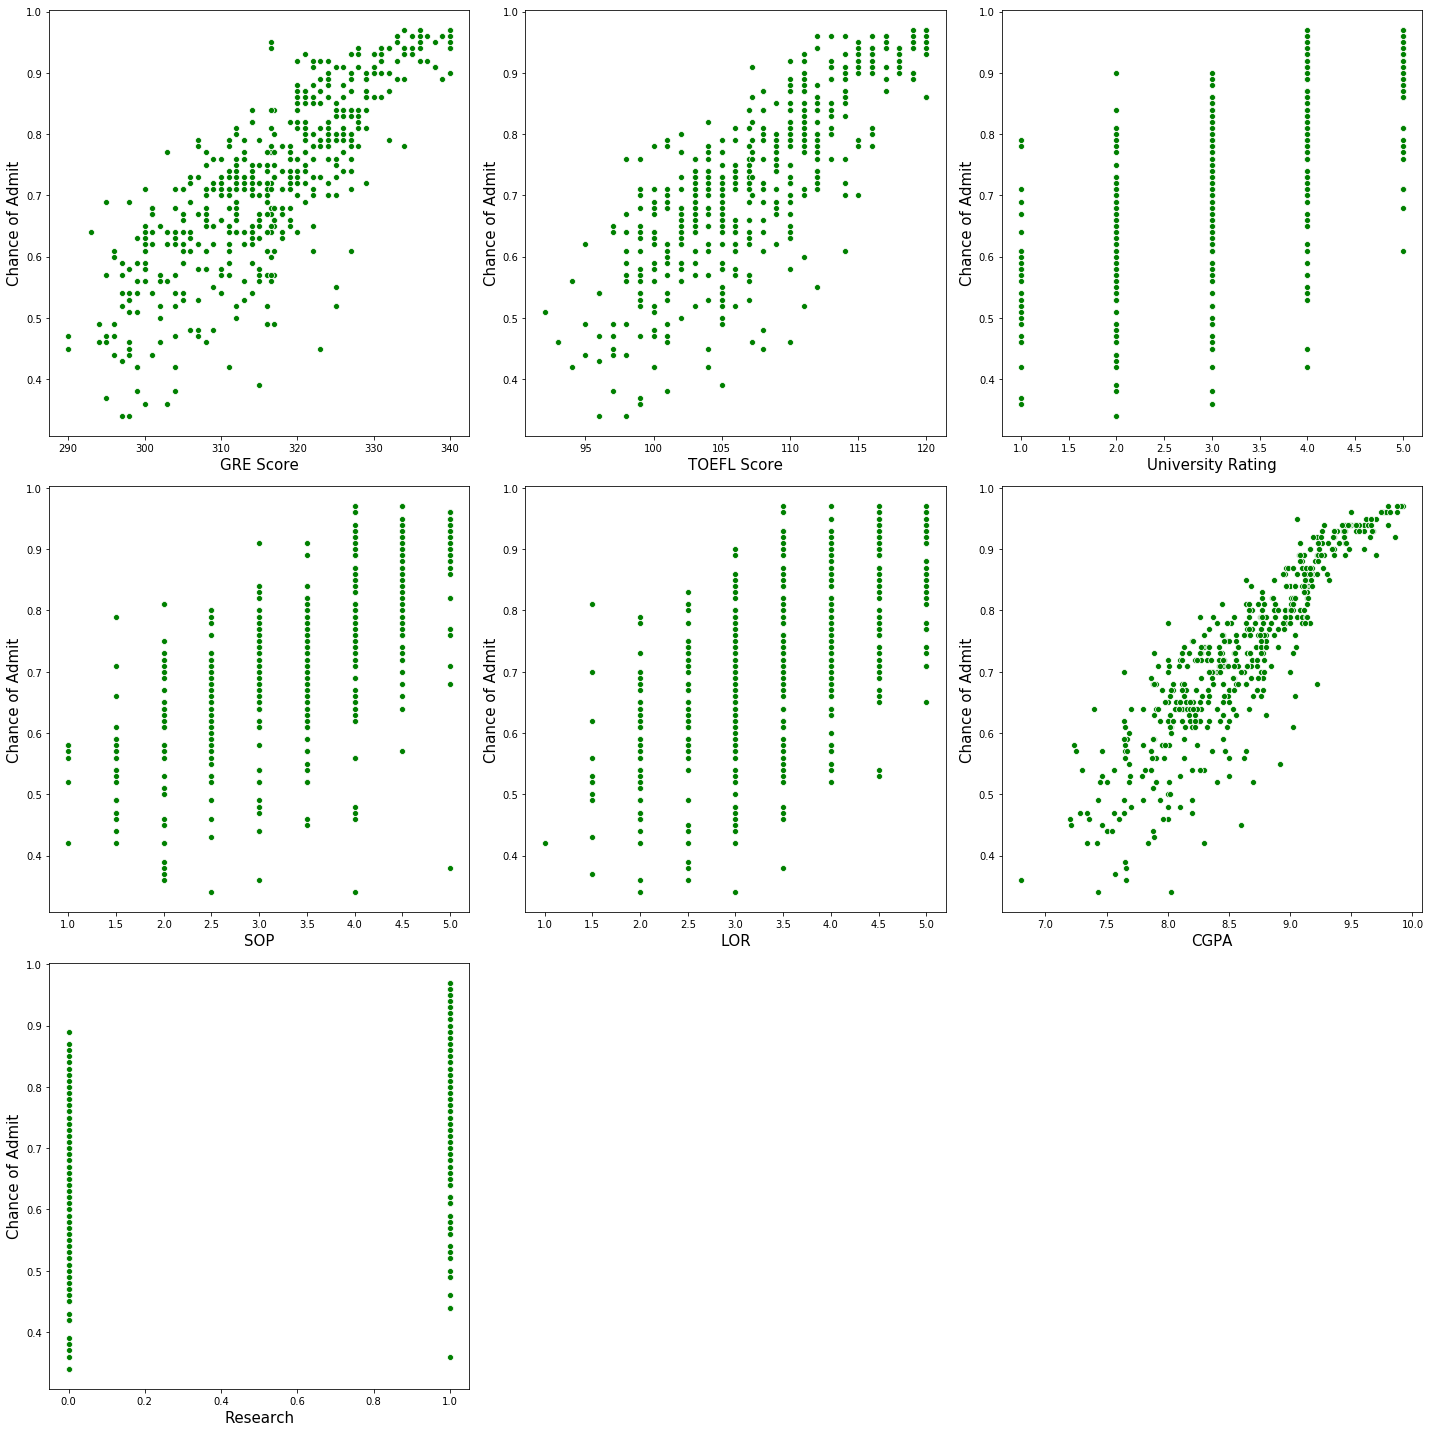

In [65]:
plotno=1
plt.figure(figsize=(20,20))
for col in x:
    if plotno<8:
        plt.subplot(3,3,plotno)
        sns.scatterplot(x[col],y,color='G')
        plt.xlabel(col,fontsize=15)
        plt.ylabel("Chance of Admit",fontsize=15)
    plotno+=1
plt.tight_layout()

In [66]:
#Scaling or normalizing the data
scaler=StandardScaler()
Xscaled_=scaler.fit_transform(x)

C:\Users\p.c\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\p.c\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [67]:
Xscaled_

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [68]:
xtrain,xtest,ytrain,ytest=train_test_split(Xscaled_,y,test_size=0.25,random_state=3265)

In [69]:
xtrain

array([[ 0.85111073,  1.12686938, -0.10462259, ..., -0.52351283,
         0.88307384,  0.88640526],
       [-0.23066792,  0.1343601 ,  0.78200955, ...,  0.55812525,
         0.76721964,  0.88640526],
       [ 0.67081429, -0.03105811,  0.78200955, ...,  1.09894429,
         0.48585943,  0.88640526],
       ...,
       [ 0.94125895,  1.29228759,  0.78200955, ...,  0.55812525,
         0.93272564, -1.12815215],
       [-0.41096436, -0.69273097,  0.78200955, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.40036962,  1.12686938,  0.78200955, ...,  1.63976333,
         0.89962444, -1.12815215]])

In [70]:
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
df.tail(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [72]:
reg.predict(scaler.transform([[312.0,103.0,4.0,4.0,5.0,8.43,0]]))

array([0.70647865])

In [73]:
reg.predict(StandardScaler().fit_transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))

array([0.7229096])

In [74]:
reg.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))

array([0.82858016])

In [76]:
reg.predict(StandardScaler().transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [77]:
#Saving Model
filename="regression_model.pickle"
pickle.dump(reg,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))

In [78]:
a

array([0.82858016])

In [79]:
#Adjusted r square
reg.score(xtrain,ytrain)

0.8332489105348617

In [80]:
reg.score(xtest,ytest)   #we compare with L1 & L2 Form

0.783227821115422

In [81]:
ypred=reg.predict(xtest)

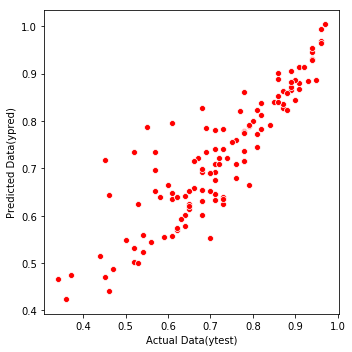

In [82]:
plt.figure(figsize=(5,5))
sns.scatterplot(ytest,ypred,color='r')
plt.xlabel("Actual Data(ytest)")
plt.ylabel('Predicted Data(ypred)')
plt.tight_layout()

## Model Evaluation

In [83]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE=mean_absolute_error(ypred,ytest)
MSE=mean_squared_error(ypred,ytest)
RMSE=np.sqrt(MSE)
print("Mean Absolute Error:---------->",MAE,"\nMean Squared Error:-------->",MSE,"\nRoot Mean Squared Error:-------->",RMSE)

Mean Absolute Error:----------> 0.046766399489193984 
Mean Squared Error:--------> 0.0046195018409019096 
Root Mean Squared Error:--------> 0.06796691725318951


##  Regularization

In [84]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

### L1 Form

In [85]:
#lassoCV return best aplha paramter i.e. learning rate after max iteration
#normalize: scaling the data
lasso=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasso.fit(xtrain,ytrain)

C:\Users\p.c\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [86]:
#Learning Rate:lambda,alpha (Gives the best learning rate)
lasso.alpha_

4.8369251259254075e-05

In [87]:
lasso_reg=Lasso(lasso.alpha_)
lasso_reg.fit(xtrain,ytrain)


Lasso(alpha=4.8369251259254075e-05, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [88]:
lasso_reg=Lasso(alpha=lasso.alpha_)
lasso_reg.fit(xtrain,ytrain)


Lasso(alpha=4.8369251259254075e-05, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
lasso_reg.score(xtest,ytest) #As we compare with model accuracy & it also gives the same accuracy so our model is nort ove fitted

0.7833361376201073

### L2 Form

In [90]:
ridge=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)

In [91]:

ridge.fit(xtrain,ytrain)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring=None, store_cv_values=False)

In [92]:
ridge.alpha_

0.011

In [93]:
ridge_reg=Ridge(alpha=ridge.alpha_)
ridge_reg.fit(xtrain,ytrain)


Ridge(alpha=0.011, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [94]:
ridge_reg=Ridge(ridge.alpha_)
ridge_reg.fit(xtrain,ytrain)


Ridge(alpha=0.011, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [95]:
ridge_reg.score(xtest,ytest) #As we compare with model accuracy & it also gives the same accuracy so our model is nort ove fitted

0.7832289608815021